# Random Forest Regression 

### Decision Tree
- Uses the **entire dataset**
- Builds **one tree**
- Prediction comes from **that single tree**
- High variance → prone to **overfitting**

### Random Forest
**Each tree:**
- Uses **random samples** of data
- Builds **many trees**
- Prediction is an **aggregate** of all trees
- Reduced variance → **better generalization**

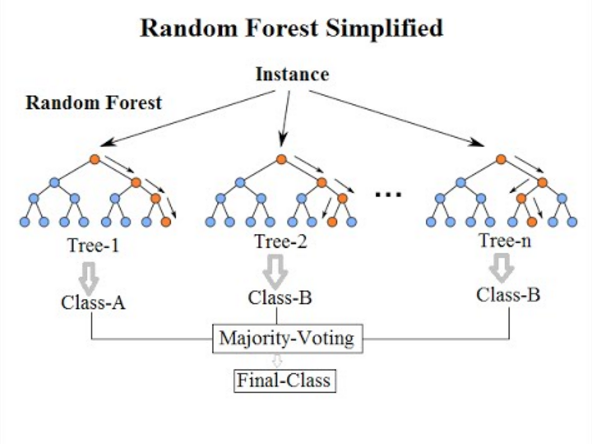

## Random Forest Regression – Worked Example

### Given Dataset

| Area (sq.ft) | Price |
|-------------|-------|
| 500 | 50 |
| 700 | 65 |
| 900 | 80 |
| 1100 | 95 |
| 1300 | 110 |

### 🔹 Step 1: Create Multiple Bootstrap Samples

In a **Random Forest**, each decision tree is trained on a **bootstrap sample**
drawn *with replacement* from the original dataset.

### Tree 1 (Bootstrap Sample)

| Area | Price |
|------|-------|
| 500  | 50 |
| 700  | 65 |
| 900  | 80 |
| 900  | 80 |
| 1300 | 110 |


### Feature Range Calculation

$$
\begin{aligned}
\min(\text{Area}) &= 500 \\
\max(\text{Area}) &= 1300 \\
\text{Range} &= 1300 - 500 = 800
\end{aligned}
$$

### 🔹 Split Condition

$$
\text{Area} \le 800
$$

            [ Area ≤ 800 ]
              /       \
           True       False
            |           |
      (500, 50)     (900, 80)
      (700, 65)     (900, 80)
                     (1300, 110)



### Tree 2 (Bootstrap Sample)

| Area | Price |
|------|-------|
| 700  | 65 |
| 1100 | 95 |
| 1300 | 110 |
| 1300 | 110 |
| 500  | 50 |


#### Feature Range Calculation

$$
\begin{aligned}
\min(\text{Area}) &= 500 \\
\max(\text{Area}) &= 1300 \\
\text{Range} &= 1300 - 500 = 800
\end{aligned}
$$


### 🔹 Split Condition

$$
\text{Area} \le 800
$$

            [ Area ≤ 800 ]
              /       \
           True       False
            |           |
      (500, 50)     (1100, 95)
      (700, 65)     (1300, 110)
                     (1300, 110)


### Tree 3 (Bootstrap Sample)

| Area | Price |
|------|-------|
| 500  | 50 |
| 700  | 65 |
| 900  | 80 |
| 1100 | 95 |
| 1100 | 95 |


### Feature Range Calculation

$$
\begin{aligned}
\min(\text{Area}) &= 500 \\
\max(\text{Area}) &= 1100 \\
\text{Range} &= 1100 - 500 = 600
\end{aligned}
$$


### 🔹 Split Condition

$$
\text{Area} \le 600
$$

            [ Area ≤ 600 ]
              /       \
           True       False
            |           |
      (500, 50)     (700, 65)
                     (900, 80)
                     (1100, 95)
                     (1100, 95)

## 🔹 Step 2: Prediction for Test Input

**Test sample:**

$$
x = 1000 \;\text{sq.ft}
$$


### Prediction from Each Tree


#### 🔹 Tree 1

For Tree 1, the test input falls into the **right subtree** with prices:
\(80,\; 80,\; 110\)

$$
\begin{aligned}
\hat{y}_{1}
&= \frac{80 + 80 + 110}{3} \\
&= \frac{270}{3} \\
&= 90
\end{aligned}
$$


#### 🔹 Tree 2

For Tree 2, the test input falls into the **right subtree** with prices:
\(95,\; 110,\; 110\)

$$
\begin{aligned}
\hat{y}_{2}
&= \frac{95 + 110 + 110}{3} \\
&= \frac{315}{3} \\
&= 105
\end{aligned}
$$


#### 🔹 Tree 3

For Tree 3, the test input falls into the **right subtree** with prices:
\(65,\; 80,\; 95,\; 95\)

$$
\begin{aligned}
\hat{y}_{3}
&= \frac{65 + 80 + 95 + 95}{4} \\
&= \frac{335}{4} \\
&= 83.75
\end{aligned}
$$


## 🔹 Step 3: Final Random Forest Prediction

In **Random Forest Regression**, the final prediction is obtained by averaging
the predictions from all individual trees.

$$
\begin{aligned}
\hat{y}_{\text{RF}}
&= \frac{1}{T} \sum_{t=1}^{T} \hat{y}^{(t)} \\
\\
\hat{y}_{\text{final}}
&= \frac{\hat{y}_{1} + \hat{y}_{2} + \hat{y}_{3}}{3} \\
&= \frac{90 + 105 + 83.75}{3} \\
&= \frac{278.75}{3} \\
&\approx 92.9
\end{aligned}
$$


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data = pd.read_csv("Datasets/house_price_decision_tree.csv")
data

,house_size_sqft,bedrooms,age_years,price_lakhs
0,450,1,25,38.5
1,500,1,22,42.0
2,550,1,20,45.2
3,600,2,18,50.1
4,650,2,17,53.0
...,...,...,...,...
86,4750,5,1,348.0
87,4800,5,1,351.6
88,4850,5,1,355.2
89,4900,5,1,358.8


In [3]:
X = data[['house_size_sqft', 'bedrooms', 'age_years']]
y = data['price_lakhs']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [5]:
model = RandomForestRegressor(n_estimators=100, criterion='squared_error', max_depth=5, random_state=42)

In [6]:
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, random_state=42)

In [7]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [8]:
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)

print("Train MSE:", train_mse)
print("Test MSE:", test_mse)

Train MSE: 2.0254291826887076
Test MSE: 8.705405510048049


In [9]:
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print("Train R²:", train_r2)
print("Test R²:", test_r2)

Train R²: 0.9997742949260597
Test R²: 0.998981320668142


In [10]:
new_house = pd.DataFrame({
    'house_size_sqft': [1500],
    'bedrooms': [3],
    'age_years': [5]
})

predicted_price = model.predict(new_house)
print(f"Predicted house price: {predicted_price[0]:.2f} lakhs")

Predicted house price: 118.05 lakhs
